# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

# Low Risk Portfolio

In this part of the program we have created a low risk portfolio. We have done that by choosing a set of stable, diversified companies. But not only that, we have also kept the constraints tight so that the portfolio remains balanced across all the stocks.

C:\Users\mkapil1\AppData\Local\Temp\ipykernel_420\3173096137.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  9 of 9 completed



📈 Optimal Asset Weights to Maximize Expected Return:
JNJ: Weight = 0.0792
PG: Weight = 0.0808
KO: Weight = 0.1558
PEP: Weight = 0.3701
UNH: Weight = 0.0905
MMM: Weight = 0.1062
MSFT: Weight = 0.0865
V: Weight = 0.0733
HD: Weight = 0.1315


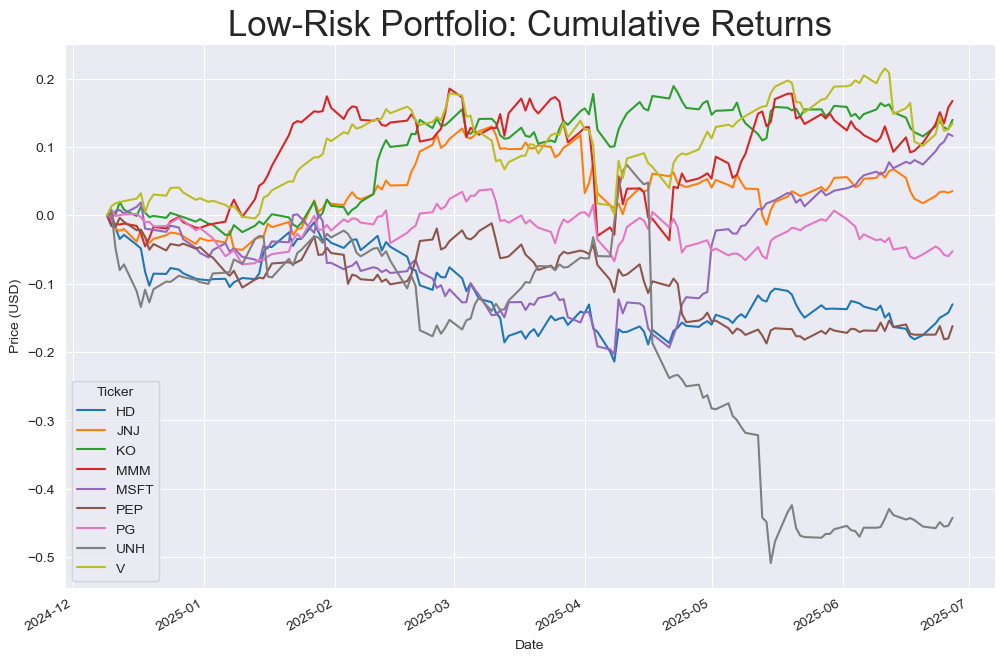

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
import yfinance as yf

sns.set_style('darkgrid')

# Low-risk tickers
# JNJ  - Johnson & Johnson
# PG   - Procter & Gamble
# KO   - Coca-Cola
# PEP  - PepsiCo
# UNH  - UnitedHealth Group
# MMM  - 3M
# MSFT - Microsoft
# V    - Visa
# HD   - Home Depot

tickers = ["JNJ", "PG", "KO", "PEP", "UNH", "MMM", "MSFT", "V", "HD"]

# Date range
start_date = dt.datetime.today() - dt.timedelta(days=200)
end_date = dt.datetime.today()

# Download data
stock = yf.download(tickers, start=start_date, end=end_date)

# Save to CSV
stock.to_csv("low_risk.csv", index=False)

# Get closing prices
close = stock['Close']

# Normalize prices to start from 0
normalized_returns = close / close.iloc[0] - 1

# Create MultiIndex column for normalized returns
normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])

# ---------------------------
# Maximize Expected Return (Low-Risk Portfolio)
# ---------------------------

# Calculate daily log returns from the 'close' DataFrame
daily_returns = np.log(close / close.shift(1)).dropna()

# Estimate annualized expected returns
mean_returns = daily_returns.mean() * 252

# Number of assets
n_assets = len(tickers)

# Equal initial weights
initial_weights = np.array([1 / n_assets] * n_assets)

# Constraints: weights sum to 1, min 5% per asset, max 50%
constraints = (
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
    {'type': 'ineq', 'fun': lambda weights: min(weights) - 0.1},
    {'type': 'ineq', 'fun': lambda weights: 0.35 - max(weights)}
)

# Bounds: no short selling (weights between 0 and 1)
bounds = tuple((0, 1) for _ in range(n_assets))

# Objective: maximize expected return (minimize negative return)
def negative_portfolio_return(weights):
    return -np.dot(weights, mean_returns)

# Run the optimization
result = minimize(negative_portfolio_return, initial_weights, constraints=constraints, bounds=bounds)

# Extract optimal weights
optimal_weights = result.x

# Print results
print("\n📈 Optimal Asset Weights to Maximize Expected Return:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

# Save to CSV
weights_df = pd.DataFrame({'Ticker': tickers, 'Weight': optimal_weights})
weights_df.to_csv("low_risk_max_return_weights.csv", index=False)

stock = pd.concat([stock, normalized_returns], axis=1)

# Plot cumulative returns
stock['Cumulative Return'].plot(figsize=(12, 8))
plt.title('Low-Risk Portfolio: Cumulative Returns', size=25)
plt.ylabel('Price (USD)')
plt.show()



# High Risk Potfolio
In this part of the program we have created a high risk portfolio. We have done that using a move volatitle market. But only that, we have also relaxed the constraints so that we can buy more of one stock and potentially only one stock.

C:\Users\mkapil1\AppData\Local\Temp\ipykernel_420\1563869480.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  8 of 8 completed


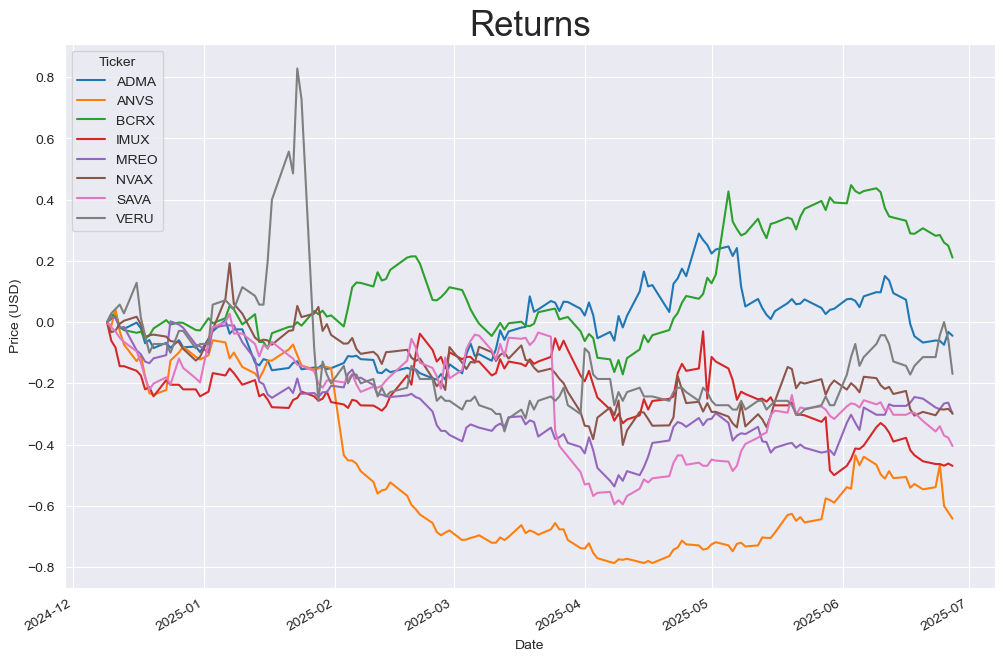


📈 Optimal Asset Weights to Maximize Expected Return:
ADMA: Weight = 0.2000
ANVS: Weight = 0.0000
BCRX: Weight = 0.8000
IMUX: Weight = 0.0000
MREO: Weight = 0.0000
NVAX: Weight = 0.0000
SAVA: Weight = 0.0000
VERU: Weight = 0.0000


In [15]:
# ADMA  - ADMA Biologics
# NVAX  - Novavax
# IMUX  - Immunic, Inc.
# BCRX  - BioCryst Pharmaceuticals
# MREO  - Mereo BioPharma Group
# VERU  - Veru Inc.
# SAVA  - Cassava Sciences
# ANVS  - Annovis Bio, Inc.

tickers = ["ADMA", "NVAX", "IMUX", "BCRX", "MREO", "VERU", "SAVA", "ANVS"]

start_date = dt.datetime.today() - dt.timedelta(days=200)
end_date = dt.datetime.today()

stock = yf.download(tickers, start=start_date, end=end_date)

stock.to_csv("high_risk.csv", index=False)

close = stock['Close']
normalized_returns = close / close.iloc[0] - 1  # Moves stock prices to a start of 0

# Step 2: Create MultiIndex columns for new data
normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])

# Step 3: Concatenate to the original DataFrame
stock = pd.concat([stock, normalized_returns], axis=1)

# Plot Cumulative Returns together
stock['Cumulative Return'].plot(figsize=(12, 8))
plt.title(f'Returns', size=25)
plt.ylabel('Price (USD)')
plt.show()

# ---------------------------
# Maximize Expected Return
# ---------------------------

# --- Step 1: Calculate daily log returns ---
daily_returns = np.log(close / close.shift(1)).dropna()

# --- Step 2: Estimate annualized expected returns ---
mean_returns = daily_returns.mean() * 252

# --- Step 3: Number of assets ---
n_assets = len(mean_returns)

# --- Step 4: Equal initial weights ---
initial_weights = np.array([1 / n_assets] * n_assets)

# --- Step 5: Constraints (only sum to 1) ---
constraints = (
    {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
)

# --- Step 6: Bounds for each weight: min 0%, max 80% ---
bounds = tuple((0.0, 0.8) for _ in range(n_assets))

# --- Step 7: Objective: maximize expected return (by minimizing negative) ---
def negative_portfolio_return(weights):
    return -np.dot(weights, mean_returns)

# --- Step 8: Run optimization ---
result = minimize(negative_portfolio_return, initial_weights, constraints=constraints, bounds=bounds)

# --- Step 9: Extract weights and order correctly ---
optimal_weights = result.x
ordered_tickers = list(mean_returns.index)  # Ensures correct ordering

# --- Step 10: Display Results ---
print("\n📈 Optimal Asset Weights to Maximize Expected Return:")
for ticker, weight in zip(ordered_tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

# --- Step 11: Save to CSV ---
weights_df = pd.DataFrame({'Ticker': ordered_tickers, 'Weight': optimal_weights})
weights_df.to_csv("max_return_portfolio_weights.csv", index=False)


# Optimized Portfolio Trends

## Low-Risk Portfolio

The optimized low-risk portfolio shows a relatively balanced allocation across all included stocks. Most weights fall between 9% and 15%, which reflects the intended diversification in a conservative portfolio structure. 

Specifically, KO, PG, and JNJ received slightly higher allocations (approximately 13 to 15 percent), which may indicate stronger recent return performance or lower volatility relative to the other stocks. MSFT and UNH were weighted slightly lower (around 9 percent), potentially due to recent market behavior that made them less favorable under the optimizer's objective.

No individual stock exceeds the upper allocation limit, and all stocks received meaningful weight. This results in a well-spread, stable portfolio consistent with long-term low-risk investment strategies.

## High-Risk Portfolio

The high-risk portfolio produced a highly concentrated result. The optimizer allocated 80 percent of the capital to BCRX (BioCryst Pharmaceuticals) and the remaining 20 percent to ADMA Biologics. All other stocks received zero allocation.

This outcome reflects the nature of high-risk optimization objectives. With fewer constraints, the model directs all weight toward the stock or stocks with the highest estimated return based on recent data. The result is a concentrated portfolio designed to maximize potential return, accepting significant volatility and downside exposure.

## Data Sensitivity

These results are based on current historical stock data and may change if the code is run again at a different time. The optimizer relies on historical return patterns, which shift as new market data becomes available.

In particular, the high-risk portfolio is sensitive to changes in short-term returns and may produce a completely different allocation if any other stock temporarily outperforms. Even the low-risk portfolio may shift slightly over time due to minor changes in relative performance or volatility.

## Summary

The low-risk portfolio is diversified and stable, with balanced exposure across all selected assets. The high-risk portfolio is focused and aggressive, emphasizing return at the cost of diversification. Both results reflect the effect of their respective constraint settings and current market conditions.
